In [3]:
import pickle
import numpy as np

pncdir = '/home/anton/Documents/Tulane/Research/data-sav/anton/cohorts/PNC/'
pncdemo = pickle.load(open(f'{pncdir}/demographics.pkl', 'rb'))

rest = []
nback = []
emoid = []

for sub in pncdemo['age_at_cnb']:
    try:
        r = np.load(f'{pncdir}/fc/{sub}_task-rest_fc.npy')
        n = np.load(f'{pncdir}/fc/{sub}_task-nback_fc.npy')
        e = np.load(f'{pncdir}/fc/{sub}_task-emoid_fc.npy')
        rest.append(r)
        nback.append(n)
        emoid.append(e)
    except:
        pass

rest = np.stack(rest)
nback = np.stack(nback)
emoid = np.stack(emoid)

print([a.shape for a in [rest, nback, emoid]])

[(1345, 34716), (1345, 34716), (1345, 34716)]


In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

def rmse(yhat, y):
    return torch.mean((yhat-y)**2)**0.5

def decim(loss):
    return "{:.2f}".format(float(loss))

class FCImputer(nn.Module):
    def __init__(self):
        super(FCImputer, self).__init__()
        self.fc1 = nn.Linear(34716, 1000).float().cuda()
        self.fc2 = nn.Linear(1000, 34716).float().cuda()

    def forward(self, x):
        y = self.fc1(x)
        y = self.fc2(y).squeeze()
        return y

rn = FCImputer()
nr = FCImputer()
optim = torch.optim.Adam(list(rn.parameters())+list(nr.parameters()), lr=1e-4)

nepochs = 5000
pperiod = 50
bsize = 200

rtr, rt, ntr, nt = train_test_split(rest, nback, train_size=0.8)

xrtr = torch.from_numpy(rtr).float().cuda()
xntr = torch.from_numpy(ntr).float().cuda()

for e in range(nepochs):
    for b in range(0,len(xrtr),bsize):
        optim.zero_grad()
        xrb = xrtr[b:b+bsize]
        xnb = xntr[b:b+bsize]
        d1 = rn(xrb)
        d2 = nr(xnb)
        loss1 = rmse(d1, xnb-xrb)
        loss2 = rmse(d2, xrb-xnb)
        loss3 = rmse(d1, -d2)
        (loss1+loss2+loss3).backward()
        optim.step()
        if e % pperiod == 0 or e == nepochs-1:
            print(f'{e} {decim(loss1)} {decim(loss2)} {decim(loss3)}')

print('Complete')

0 0.28 0.28 0.18
0 0.58 0.53 0.68
0 0.40 0.40 0.41
0 0.33 0.33 0.31
0 0.32 0.31 0.27
0 0.32 0.31 0.23
50 0.24 0.24 0.07
50 0.23 0.24 0.06
50 0.23 0.23 0.07
50 0.23 0.23 0.06
50 0.23 0.23 0.06
50 0.23 0.23 0.05
100 0.25 0.24 0.22
100 0.24 0.24 0.20
100 0.22 0.22 0.07
100 0.24 0.24 0.15
100 0.23 0.23 0.12
100 0.22 0.22 0.07
150 0.22 0.22 0.07
150 0.22 0.22 0.06
150 0.21 0.22 0.06
150 0.22 0.22 0.06
150 0.22 0.22 0.06
150 0.21 0.21 0.05
200 0.22 0.23 0.11
200 0.22 0.22 0.12
200 0.22 0.22 0.13
200 0.23 0.23 0.12
200 0.23 0.23 0.13
200 0.21 0.22 0.12
250 0.23 0.23 0.13
250 0.23 0.23 0.12
250 0.22 0.23 0.13
250 0.23 0.23 0.14
250 0.22 0.23 0.12
250 0.21 0.21 0.10
300 0.23 0.23 0.15
300 0.24 0.23 0.15
300 0.23 0.22 0.15
300 0.23 0.23 0.15
300 0.23 0.23 0.15
300 0.21 0.21 0.12
350 0.23 0.23 0.13
350 0.23 0.22 0.13
350 0.22 0.22 0.13
350 0.22 0.22 0.13
350 0.22 0.22 0.14
350 0.20 0.20 0.11
400 0.22 0.22 0.13
400 0.23 0.22 0.14
400 0.22 0.22 0.14
400 0.22 0.22 0.13
400 0.22 0.21 0.15
400 0.20 0.

KeyboardInterrupt: 

In [9]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


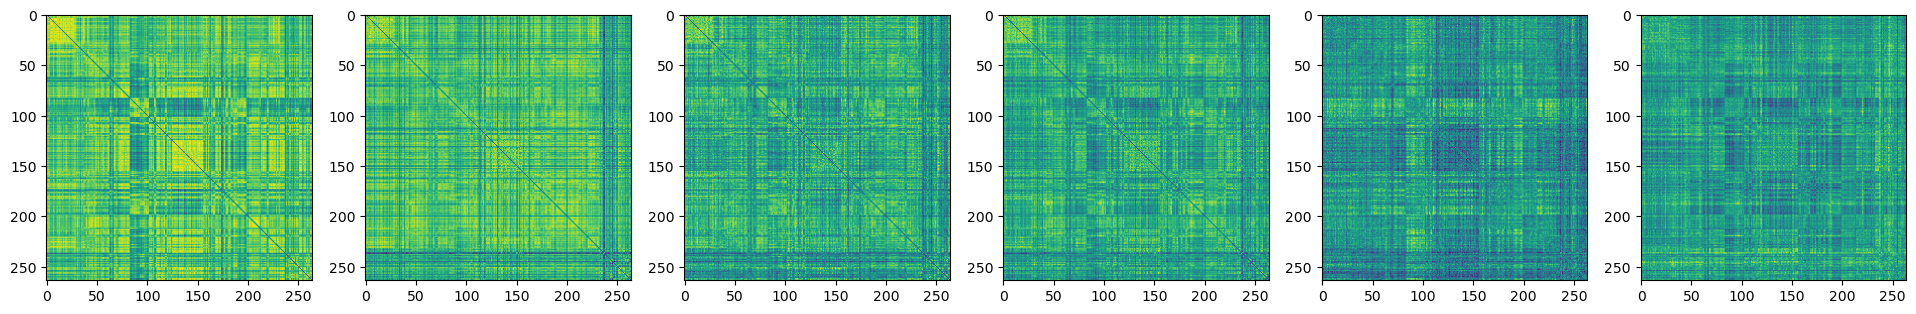

In [48]:
# Last batch group

import matplotlib.pyplot as plt

def view(x):
    return remap(vec2mat(x.detach().cpu().numpy()))

idx = 31

fig, ax = plt.subplots(1,6,figsize=(24,4))
ax[0].imshow(view(xrb[idx]))
ax[1].imshow(view(xnb[idx]))
ax[2].imshow(view(d1[idx]+xrb[idx]))
ax[3].imshow(view(d2[idx]+xnb[idx]))
ax[4].imshow(view(d1[idx]))
ax[5].imshow(view(d2[idx]))
fig.show()

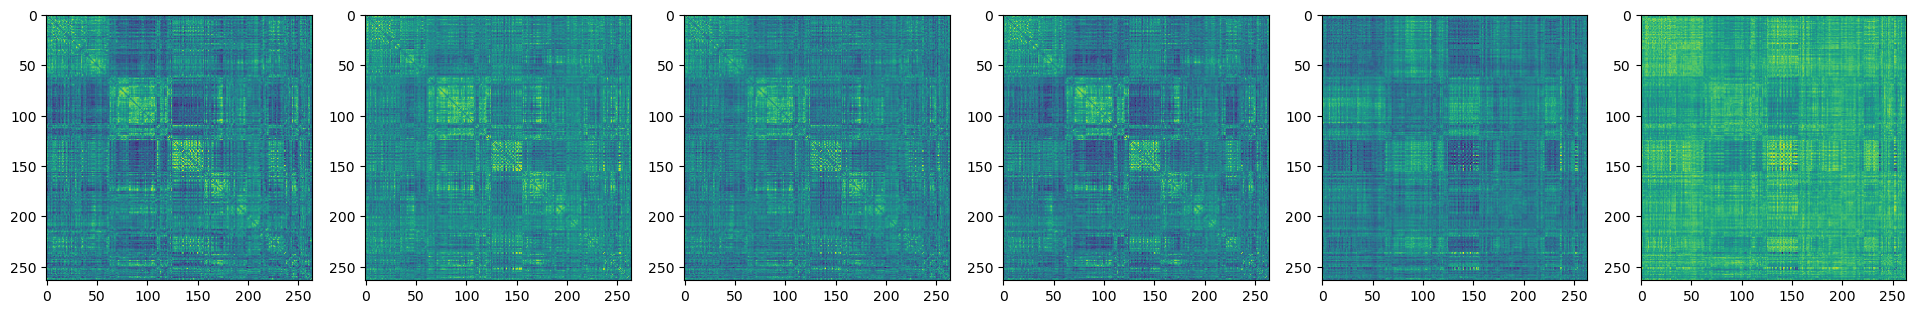

In [49]:
# Whole training set

def viewsimp(x):
    return remap(vec2mat(x))

with torch.no_grad():
    d1 = rn(xrtr)
    d2 = nr(xntr)

idx = 16

fig, ax = plt.subplots(1,6,figsize=(24,4))
ax[0].imshow(view(xrtr[idx]))
ax[1].imshow(view(xntr[idx]))
ax[2].imshow(view(d1[idx]+xrtr[idx]))
ax[3].imshow(view(d2[idx]+xntr[idx]))
ax[4].imshow(view(d1[idx]))
ax[5].imshow(view(d2[idx]))
fig.show()

0.23 0.25


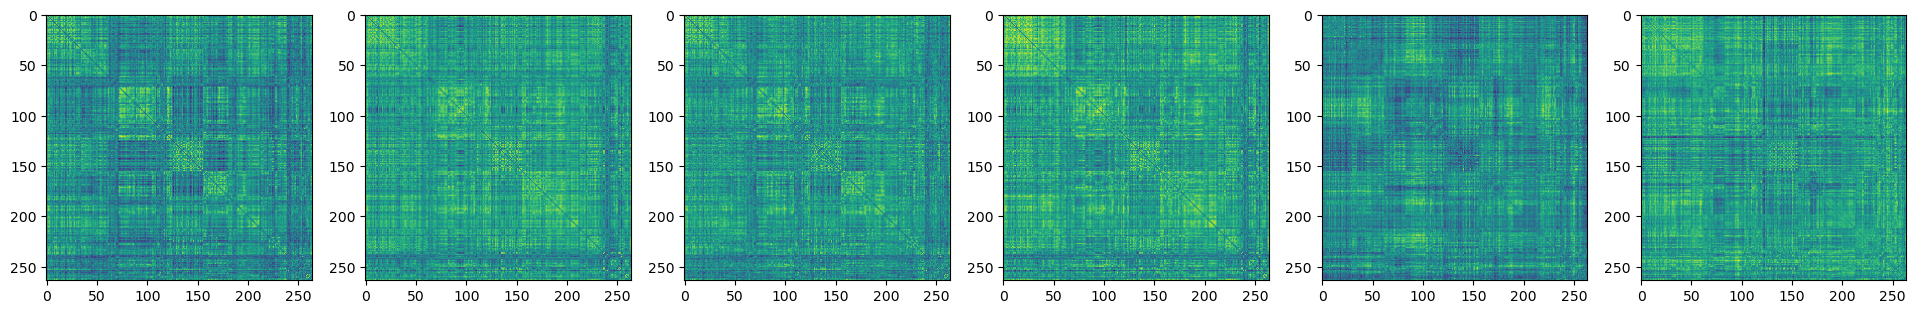

In [50]:
# Test set

xrt = torch.from_numpy(rt).float().cuda()
xnt = torch.from_numpy(nt).float().cuda()

with torch.no_grad():
    d1 = rn(xrt)
    d2 = nr(xnt)

    loss1 = rmse(d1, xnt-xrt)
    loss2 = rmse(d2, xrt-xnt)

    print(f'{decim(loss1)} {decim(loss2)}')

idx = 20

fig, ax = plt.subplots(1,6,figsize=(24,4))
ax[0].imshow(view(xrt[idx]))
ax[1].imshow(view(xnt[idx]))
ax[2].imshow(view(d1[idx]+xrt[idx]))
ax[3].imshow(view(d2[idx]+xnt[idx]))
ax[4].imshow(view(d1[idx]))
ax[5].imshow(view(d2[idx]))
fig.show()